<a href="https://colab.research.google.com/github/sakamoto-hands-on/DataScience_MatsuoLab_HandsOn/blob/master/DataVisualization_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlibを使ったデータ可視化

### [松尾研究室のデータサイエンティスト講座 公開ページ](https://weblab.t.u-tokyo.ac.jp/en/gci_contents/)を参考に、手を動かしながら学ぶ

## データの可視化

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

<練習問題 1>

以前扱った学生のデータ（student-mat.csv）を使って、学校を選んだ理由（reason）を円グラフ化して、それぞれの割合を出してください。

In [0]:
import requests, zipfile
from io import StringIO
import io
# データがあるurl の指定
zip_file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"

# データをurlから取得する
r = requests.get(zip_file_url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [5]:
student_data_math = pd.read_csv("student-mat.csv", sep=";")
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [6]:
student_data_math['reason'].describe()

count        395
unique         4
top       course
freq         145
Name: reason, dtype: object

In [8]:
student_data_math['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [9]:
student_data_math['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

(-1.119, 1.111, -1.104, 1.100)

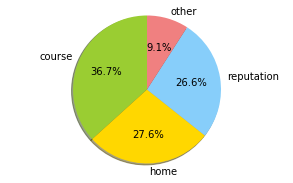

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3),facecolor="white")

labels = 'course', 'home', 'reputation', 'other'
sizes = student_data_math['reason'].value_counts()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0) 

# startangleは各要素の出力を開始する角度を表す(反時計回りが正), 向きはcounterclockで指定可能
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')



---



<練習問題 2>

上記と同じデータで、higher - 高い教育を受けたいかどうか(binary: yes or no)を軸にして、それぞれの数学の最終成績G3の平均値を棒グラフで表示してください。ここから何か推測できることはありますか？

In [13]:
student_data_math.groupby("higher")["G3"].mean()

higher
no      6.800
yes    10.608
Name: G3, dtype: float64

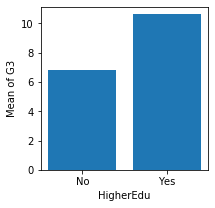

In [25]:
# 画像の大きさとバッグカラーの設定
plt.figure(figsize=(3,3),facecolor="white")

X = [1,2]
Y = student_data_math.groupby("higher")["G3"].mean()

plt.bar(X,Y, align="center", width=0.8)
plt.xticks(X, ['No','Yes'])
plt.ylabel("Mean of G3")
plt.xlabel("HigherEdu")
plt.grid(False)



---



<練習問題 3>

上記と同じデータで、通学時間（traveltime）を軸にして、それぞれの数学の最終成績G3の平均値を横棒グラフで表示してください。何か推測できることはありますか？

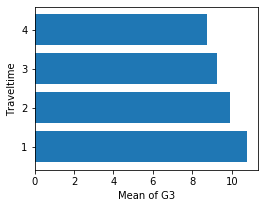

In [34]:
plt.figure(figsize=(4,3),facecolor="white")

X = [1,2,3,4]
Y = student_data_math.groupby("traveltime")["G3"].mean()

plt.barh(X,Y, align="center")
#plt.xticks(X, ['No','Yes'])
plt.ylabel("Traveltime")
plt.xlabel("Mean of G3")
plt.grid(False)



---

